In [1]:
from optical.waveguides import rectangular, twisted_rectangular, cylindrical, curved
import numpy as np

WG_list = [
    cylindrical(
        delta_n = 1.e-10,
        radius = lambda z: 10. - (z / 50.) ** 2.,
        zi = 0., zf = 50.,
        positions=[(0.,0.), (5., 0.)],
        inhomogeneous=True,
    ),
];

In [2]:
x = np.linspace(-80.,+80.,501);
y = np.linspace(-80.,+80.,501);
X, Y = np.meshgrid(x,y);

In [3]:
from optical.beam import gaussian, laguerre_gauss, hermite_gauss, bessel

G = gaussian(w0 = 30., region=(X,Y));
HG = hermite_gauss(w0 = 30., indices=(1,2), region=(X,Y));
LG = laguerre_gauss(w0 = 30., l = 1, region=(X,Y));
J = bessel(k_t = 0.5, m = 2, region=(X,Y));

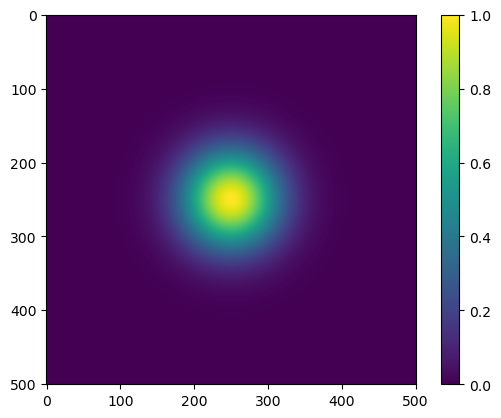

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, ax = plt.subplots();

teste = ax.imshow(np.abs(G) ** 2.);
fig.colorbar(teste)

In [5]:
from optical import medium
from optical.beam.propagation import split_step, trotter_suzuki
from optical.beam.propagation.boundary import absorbing

alpha, beta = 1.e-2, 0.25;

In [6]:
Uss = split_step(
    G,
    532.e-3,
    medium(
        n0 = 1.,
        non_linearity = lambda u: -alpha / (1. + beta * np.abs(u) ** 2.)
    ),
    (X, Y),
    5000.,
    iterations = 500,
);

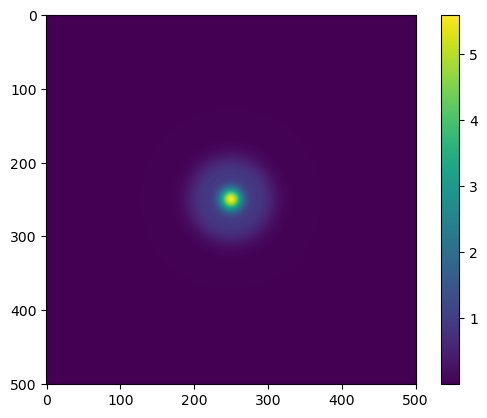

In [7]:
%matplotlib inline

fig, ax = plt.subplots();

teste = ax.imshow(np.abs(Uss) ** 2.);
fig.colorbar(teste)

In [8]:
Uts = trotter_suzuki(
    G,
    532.e-3,
    medium(
        n0 = 1.,
        non_linearity = lambda u: -alpha / (1. + beta * np.abs(u) ** 2.)
    ),
    (X, Y),
    5000.,
    iterations = 250,
);

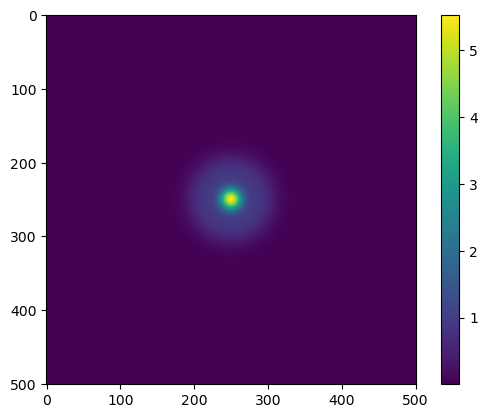

In [9]:
%matplotlib inline

fig, ax = plt.subplots();

teste = ax.imshow(np.abs(Uts) ** 2.);
fig.colorbar(teste)

In [14]:
Uss = split_step(
    G,
    532.e-3,
    medium(
        n0 = 1.,
    ),
    (X, Y),
    50000.,
    iterations = 100,
    boundary = absorbing((20., 20.), 0.5)
);

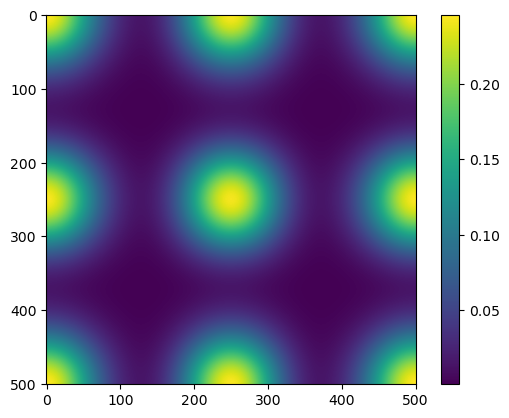

In [15]:
%matplotlib inline

fig, ax = plt.subplots();

teste = ax.imshow(np.abs(Uss) ** 2.);
fig.colorbar(teste)